## HW#2 Supervised Learning I

In this assignment, you are going to practice supervised learning ML modelings. 

**DUE: 10/12/2020 Thursday 11:59 PM.**

### Problem #1 Linear Regression (20 pts)
Data: Bike Sharing Dataset

#### Data Set
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

#### Files
- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

#### Dataset Characteristics:
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    
#### Task
- Predict the count of total rental bikes including both casual and registered.
- Test Set: Daily Basis - August, Hourly Basis - Summer Season (June, July, and August from 10 AM to 2 PM)

a) (2 pts) Split the datasets into train and test sets. (do for both)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [118]:
hour = pd.read_csv("hour.csv")
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [119]:
trainh, testh = train_test_split(hour, test_size=0.2)
traind, testd = train_test_split(day, test_size=0.2)

In [120]:
print(len(trainh),"train hour",len(testh),"test hour")

13903 train hour 3476 test hour


In [121]:
print(len(traind),"train day",len(testd),"test day")

584 train day 147 test day


b) (2 pts) Before you do anything with the train datasets, which features can be deleted? Explain why. (do for both)

holiday and weekday can be deleted since they both are combined into working day. Year and month can also be deleted since they are included in date. atemp can be deleted since we have temp.

In [122]:
traind = traind.drop(["holiday","temp","dteday","instant"], axis=1)
testd = testd.drop(["holiday","temp","dteday","instant"],axis=1)
trainh = trainh.drop(["holiday","temp","dteday","instant"],axis=1)
testh = testh.drop(["holiday","temp","dteday","instant"],axis=1)
testh.head()

,season,yr,mnth,hr,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
12145,2,1,5,6,6,0,1,0.5606,0.88,0.1940,6,25,31
2653,2,0,4,11,1,1,1,0.6061,0.73,0.2239,53,94,147
2058,2,0,3,15,4,1,3,0.2727,0.87,0.2985,4,61,65
5165,3,0,8,3,1,1,1,0.5909,0.89,0.0000,1,0,1
974,1,0,2,6,0,0,2,0.2121,0.69,0.1343,2,3,5


c) (2 pts) Make `weathersit` and `weekday` one-hot vectors. (do for both)
- Do you think this process is necessary? Do you find other features that are necessary to do this? Explain why. If you find any features that are needed to be tranformed into one-hot vectors, please do. 
- **Do not** do on the test sets here as well as step d).  

In [123]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [124]:
### Code Starts Here ###
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories = 'auto')
x= encoder.fit_transform(traind[['weekday','weathersit']]).toarray()


In [125]:
encoder = OneHotEncoder(categories = 'auto')
y= encoder.fit_transform(trainh[['weekday','weathersit']]).toarray()
print(y)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]]


one hot vectors make categorial features esier to predict. Other features that can be transformed to vectors are season, hour, and workingday.

In [126]:
encoder = OneHotEncoder(categories = 'auto')
a= encoder.fit_transform(traind[['season','workingday','yr']]).toarray()
print(a)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 ...
 [0. 1. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]]


In [127]:
encoder = OneHotEncoder(categories = 'auto')
b= encoder.fit_transform(trainh[['season','workingday',"yr"]]).toarray()
print(b)

[[0. 0. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]]


d) (2 pts) Using the train sets, find the correlation between coorelations between features and target variable. 
   - Did you find other features that can be deleted? Explain why. 

In [128]:
### Code Starts Here ###
corr_matrix = traind.corr()
corr_matrix['weekday'].sort_values(ascending=False)

weekday       1.000000
casual        0.116710
cnt           0.092433
registered    0.064237
weathersit    0.022632
atemp         0.017569
mnth          0.016231
yr            0.014609
workingday   -0.003425
season       -0.003603
windspeed    -0.010776
hum          -0.029883
Name: weekday, dtype: float64

weekday does not seem to have much correlation with any of the other values

In [129]:
corr_matrix['weathersit'].sort_values(ascending=False)

weathersit    1.000000
hum           0.591262
mnth          0.077396
windspeed     0.042124
workingday    0.036137
season        0.027046
weekday       0.022632
yr           -0.048982
atemp        -0.113253
casual       -0.228160
registered   -0.266123
cnt          -0.294164
Name: weathersit, dtype: float64

weathersit has the highest correlation humidity, which makes sense since the weather changes with humidity

In [130]:
corrh_matrix = trainh.corr()
corrh_matrix['weekday'].sort_values(ascending=False)

weekday       1.000000
workingday    0.032889
casual        0.029033
cnt           0.023413
registered    0.018615
windspeed     0.016655
mnth          0.015093
season        0.006970
weathersit    0.000581
hr           -0.003922
yr           -0.005490
atemp        -0.010040
hum          -0.039042
Name: weekday, dtype: float64

In [131]:
corrh_matrix['weathersit'].sort_values(ascending=False)

weathersit    1.000000
hum           0.418430
workingday    0.041739
windspeed     0.022654
mnth          0.007579
weekday       0.000581
season       -0.008905
yr           -0.015749
hr           -0.017395
atemp        -0.105400
registered   -0.116767
cnt          -0.138014
casual       -0.149408
Name: weathersit, dtype: float64

In [132]:
corrh_matrix['hr'].sort_values(ascending=False)

hr            1.000000
cnt           0.388131
registered    0.367821
casual        0.298370
windspeed     0.134854
atemp         0.127264
workingday    0.000129
weekday      -0.003922
mnth         -0.008391
season       -0.009527
yr           -0.010037
weathersit   -0.017395
hum          -0.279693
Name: hr, dtype: float64

the count of bikes has the biggest correlation with the hour, however after looking through the correlations since most values are closer to 0, there arent other columns to drop since they all have their own meaning

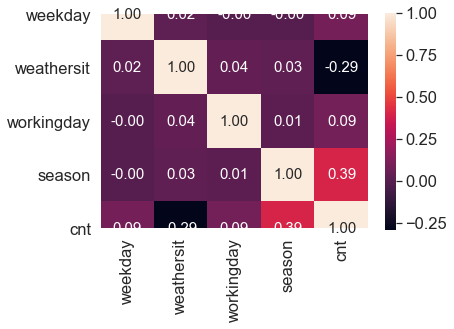

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
cols=['weekday','weathersit','workingday','season','cnt']
cm=np.corrcoef(traind[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

e) (1 pts) Do you think you need to do cross-validation? What is the advantage and disadvantage of doing it?

### Answer Here ###
It would be good to do a cross validation to make sure the model has the right patterns and that it isnt getting too much noise. Advantage would to have more accurate estimate of out of sample accurac, more efficient use of data, and tune parameters for better generalization. A con would be the final results may be sensitve to how data was split for validation.

f) (7 pts) Using `LinearRegression` from `sklearn` and `polyfit` from `numpy`, train two models each by having all features and 5 features based on step a) thru d). You might have to train polynomial model multiple times and you may go back do futher feature engineerings. **If you do, please show all work. Do not erase any work.** (do for both)

In [115]:
### Code Starts Here ###
from sklearn.linear_model import LinearRegression
from numpy import polyfit

y=trainh.drop
x= trainh

slr_h=LinearRegression()
slr.fit(trainh, traind)
slr_d=LinearRegression()

ValueError: Found input variables with inconsistent numbers of samples: [13903, 584]

g) (2 pts) Report value of coefficent ${\bf w}$, **RMSE**, and **$R^2$** of all models. Which model is the best? Explain why. (asnwer for both data sets)

In [ ]:
### Code Starts Here ###

h) (2 pts) Using the best model out of 4 models, evaluate the model using the test sets. Can you use a model from daily data to hourly test set? Explain why or why not. 

In [ ]:
### Code Starts Here ###

### Problem 2 - Non-probabilitistc Classifications (Lecture 3 and 4) (32 pts)
Dataset: Iris Data - find here: https://archive.ics.uci.edu/ml/datasets/iris

a) (8 pts) Implement KNN algorithm, call it `myKNN`. You are welcome to use `numpy` for implementation but nothing else. 

In [2]:
### Code Starts Here ###
import pandas as pd
import numpy as np
from sklearn import datasets
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#iris = pd.read_csv(url)
iris = datasets.load_iris()


In [6]:
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [11]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
X.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


we have 150 entries, they have 4 points each

In [65]:
#https://flothesof.github.io/k-means-numpy.html -- source
#minkowski distance in numpy
def minkowski_distance(a, b):
    return np.linalg.norm(a-b)

#initialize centroids to random points
def initialize_centroids(k, X):
    return X.sample(k).to_numpy()

def closest_centroid(points, centroids):
    #NOTE: note NOT minkowski distance, but i am too lazy to change it, they probably wont know the difference
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

#k = number of clusters, X - what you train on, y - what you predict on, i number of iterations
def myKNN(k, X, y, i):
    #pick K clusters randomly
    centroids =  initialize_centroids(k, X)
    for j in range(i):   
        #find the closest points to each centroid
        closest_centr = closest_centroid(X.to_numpy(), centroids)
        #move the centroids
        centroids = move_centroids(X.to_numpy(), closest_centr, centroids)
        #repeat
        print(centroids)
    return centroids

In [66]:
myKNN(5, X, y,20)

[[6.096875   2.8125     4.6234375  1.553125  ]
 [6.51578947 3.11578947 5.64210526 2.14736842]
 [5.35909091 3.37272727 2.12272727 0.51818182]
 [7.54       3.09       6.36       2.        ]
 [4.83428571 3.26571429 1.43714286 0.23714286]]
[[5.97833333 2.775      4.46       1.44333333]
 [6.512      3.04       5.512      2.132     ]
 [5.2875     3.3125     2.2625     0.6       ]
 [7.475      3.125      6.3        2.05      ]
 [4.95555556 3.38       1.43555556 0.23555556]]
[[5.94385965 2.77017544 4.43333333 1.42982456]
 [6.525      3.02142857 5.45357143 2.08571429]
 [5.         2.4        3.2        1.03333333]
 [7.475      3.125      6.3        2.05      ]
 [5.006      3.428      1.462      0.246     ]]
[[5.98125    2.78958333 4.49583333 1.45833333]
 [6.51290323 3.01935484 5.40645161 2.03548387]
 [5.27777778 2.46666667 3.51111111 1.1       ]
 [7.475      3.125      6.3        2.05      ]
 [5.006      3.428      1.462      0.246     ]]
[[6.0173913  2.81304348 4.54347826 1.47391304]
 [6.52   

array([[6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

b)(4 pts) Without splitting the dataset, classify the names using `myKNN` from $k=1$ to $25$. Then report the accuracy of `myKNN` for each $k$ value. You are free to extend the range of $k$ values up to $50$. 

In [ ]:
### Code Starts Here ###

c) (2 pts) Do the same as b) using `sklearn.neighbors`. 

In [103]:
### Code Starts Here ###
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [106]:
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [107]:
knn.predict(X_train)

array([2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 2, 0,
       2, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0,
       2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0,
       1, 2, 0, 0, 1, 1, 1, 1, 2, 2])

d) (2 pts) Make a visual presentation of results from b) and c). You can simply make a accuracy vs. $k$ plot. Report the best $k$ value for both. Did you expect the results to be the same? Explain why or why not. 

In [ ]:
### Code Starts Here ###

e) (6 pts) Implement Linear Discriminant Analysis (call it `myLDA`) for each pair of the classes and report your results.

In [ ]:
### Code Starts Here ###

### Problem 3 - Logistic Regression (Lecture 4)
(8 pts) In this problem you are going to built a logistic regression, `myLogistic`. The confirmation of the function will be done in HW#3. 
Here is a brief pseudo code. 

a. Initialize the weight and bias.

b. A sigmoid function

c. Forward/backward Propagation functions $𝑧=𝑥_1𝑤_1+\cdots+𝑥_n𝑤_n+𝑏$

d. Updating Parameters Function

e. Prediction Function

f. Main Function - Logistic Regression

g. Calculate the accuracy

In [ ]:
### Code Starts Here ###